# class Measurements_Periodic

In [1]:
%matplotlib inline
import numpy as np
from wavewatson import Waveform

gd = Waveform.load_from_file(filepath=r"demo_signals\gd.npz")
vcc = Waveform.load_from_file(filepath=r"demo_signals\vcc.npz")
vout = Waveform.load_from_file(filepath=r"demo_signals\vout.npz")

t = np.linspace(0, 1, 500, endpoint=False)
sine = Waveform(time=t, data=10 * np.sin(2 * np.pi * 5 * t) * np.linspace(0,1,len(t))[::-1])

Waveform --> Name:wave_000, Length:1000, SampleRate:3.842e+06, Tstart: 0.000e+00, Tstop:2.600e-04
Waveform --> Name:wave_000, Length:1000, SampleRate:2.005e+02, Tstart: 1.611e-02, Tstop:5.000e+00
Waveform --> Name:wave_000, Length:1000, SampleRate:1.004e+04, Tstart: 1.438e-04, Tstop:9.969e-02
Waveform --> Name:wave_000, Length:500, SampleRate:5.000e+02, Tstart: 0.000e+00, Tstop:9.980e-01


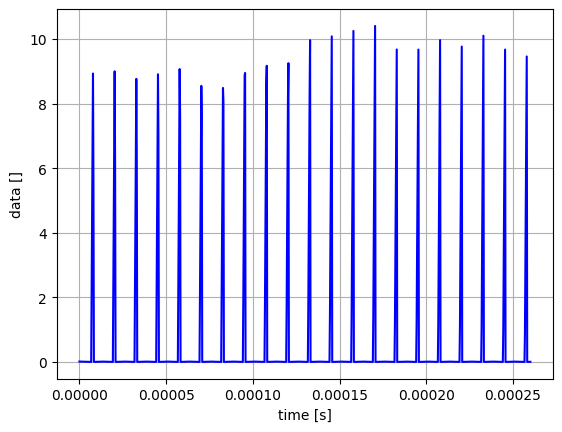

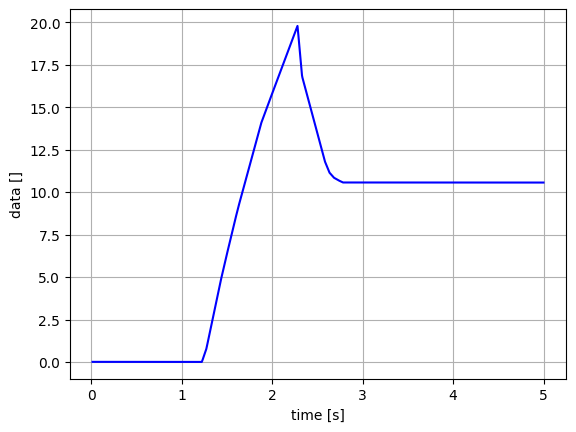

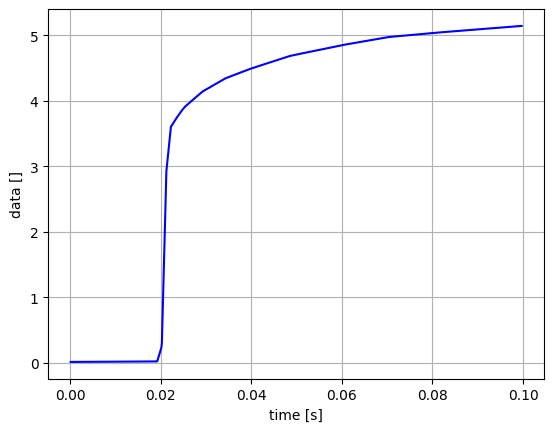

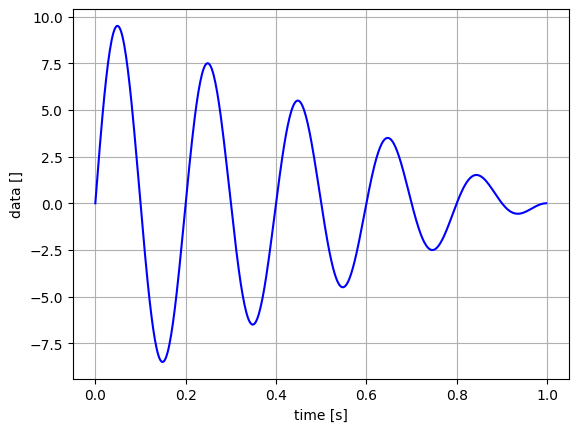

In [2]:
print(gd)
print(vcc)
print(vout)
print(sine)

gd.plot()
vcc.plot()
vout.plot()
sine.plot()

## Period Measurements

### Period

Returns the length of the last found period.

In [3]:
sine.Measurements_Periodic.period(level=0, slope="rise",hysteresis=0)

0.20000000000000007

### Period average

Calculate the average over all found periods.

In [4]:
sine.Measurements_Periodic.period_average(0,"rise",0)

0.20000000000000004

### Period curve

Returns an Waveform that represents the periods of the signal.

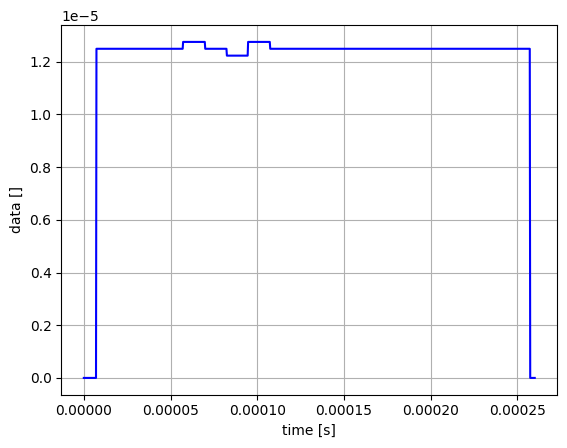

In [5]:
gd.Measurements_Periodic.period_curve(6, "rise", 1).plot()

## Frequency Measurements

### Frequency

Returns the frequency from the last found period.

In [6]:
sine.Measurements_Periodic.frequency(level=0, slope="rise", hysteresis=0)

4.999999999999998

### Frequency average

Calculate the average frequency from the whole signal.

In [7]:
sine.Measurements_Periodic.frequency_average(0,"rise", 0.0000001)

4.999999999999999

### Frequency curve

Returns a waveform that represents the frequencies from the signal.

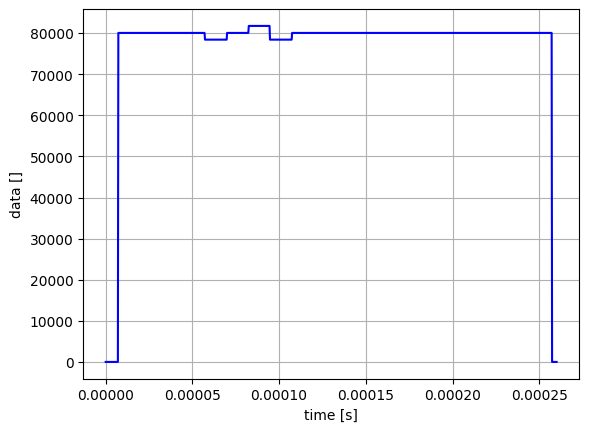

In [8]:
fc = gd.Measurements_Periodic.frequency_curve(6,"rise", 1)
fc.plot()

## Burst Measurements

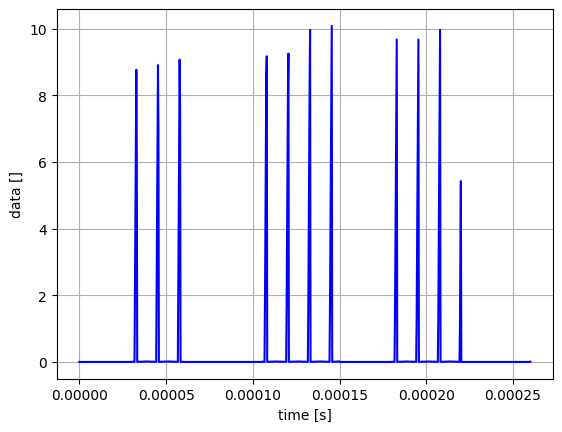

In [9]:
burst = gd.copy()
burst[0:3e-5] = 0
burst[6.0e-5:10.3e-5] = 0
burst[7.3e-5:10.5e-5] = 0
burst[15e-5:18e-5] = 0
burst[22e-5:26e-5] = 0
burst.plot()

### Find all bursts

Returns a list of dictionaries containing information about the found bursts like
start, stop, pulse count or duration

In [10]:
bursts = burst.Measurements_Periodic.find_all_bursts(level=1.0, min_burst_distance=20e-6)
for bur in bursts:
    print(bur)

{'start': 3.175175175175177e-05, 'stop': 5.8038038038038074e-05, 'duration': 2.6286286286286302e-05, 'pulse_cnt': 3}
{'start': 0.00010670670670670678, 'stop': 0.00014548548548548557, 'duration': 3.87787787787788e-05, 'pulse_cnt': 4}
{'start': 0.00018166166166166177, 'stop': 0.00021991991991992006, 'duration': 3.825825825825828e-05, 'pulse_cnt': 4}


### Find nth burst

Returns the n-th burst found

In [11]:
print(burst.Measurements_Periodic.find_nth_burst(index=0, level=1.0, min_burst_distance=20e-6, hysteresis=0.1))

{'start': 3.175175175175177e-05, 'stop': 5.8038038038038074e-05, 'duration': 2.6286286286286302e-05, 'pulse_cnt': 3}


### Get Burst Frequencies

Returns the frequencies of the burst sequence (for each burst to the next one)

In [12]:
burst.Measurements_Periodic.get_burst_frequencies(level=1.0, min_burst_distance=20e-6, hysteresis=0.1)

array([13341.34615385, 13341.34615385])

In [13]:
burst.Measurements_Periodic.get_burst_frequencies2(bursts)

array([13341.34615385, 13341.34615385])

## Timeout Measurements

### Find all timeouts

Returns all times where the signal drops and stays below a level at least timeout seconds.

In [14]:
burst.Measurements_Periodic.find_all_timeouts(timeout=20e-6, level=1, hysteresis=0.1)

array([5.80380380e-05, 1.45485485e-04, 2.19919920e-04])

### Find nth timeout

Find the n-th point where the signal start to stay below a certain value for at least a certain time.

In [15]:
burst.Measurements_Periodic.find_nth_timeout(index=-1, timeout=20e-6, level=1, hysteresis=0.1)  # Last timeout

0.00021991991991992006

## Pulse Measurements

### Find all pulses

Returns all times where a pulse occurs that has a minimum ontime of "duration" seconds.

In [16]:
burst.Measurements_Periodic.find_all_pulses(duration=1.0e-7, level=6, hysteresis=1)

array([3.22722723e-05, 4.47647648e-05, 5.72572573e-05, 1.07487487e-04,
       1.19979980e-04, 1.32472472e-04, 1.44964965e-04, 1.82442442e-04,
       1.94934935e-04, 2.07427427e-04])

### Find nth pulse

Returns the n-th pulse that has a minimum ontime of "duration" seconds.

In [17]:
burst.Measurements_Periodic.find_nth_pulse(index=1, duration=1.0e-7, level=6, hysteresis=1e-6)

4.4764764764764795e-05

### Pulse count

Returns the number of found pulses

In [18]:
burst.Measurements_Periodic.pulse_count(level=1.0, hysteresis=0.1)

11

### Pulse width positive

Returns the positive pulse width of the last found pulse

In [19]:
burst.Measurements_Periodic.width_pos(level=1.0, hysteresis=0.1)

7.807807807807708e-07

### Pulse width negative

Returns the negative pulse width of the last found pulse

In [20]:
burst.Measurements_Periodic.width_neg(level=1.0, hysteresis=0.1)

1.119119119119121e-05

## Duty Cycle Measurements

### Duty cycle positive

Returns the positive duty cycle of the last found pulse

In [21]:
gd.Measurements_Periodic.duty_cycle_pos(level=1, hysteresis=0)

0.08333333333333225

### Duty cycle negative

Returns the negative duty cycle of the last found pulse

In [22]:
gd.Measurements_Periodic.duty_cycle_neg(level=1, hysteresis=0)

0.9166666666666677

### Duty cycle positive waveform

Returns the positive duty cycle represented as waveform

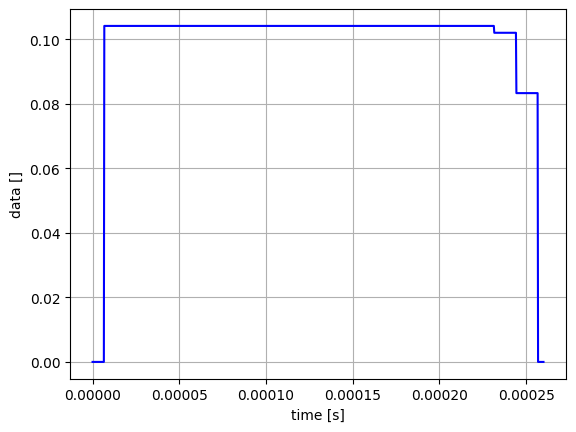

In [23]:
gd.Measurements_Periodic.dutycycle_pos_curve(level=1, hysteresis=0.1).plot()

### Duty cycle negative waveform

Returns the negative duty cycle represented as waveform

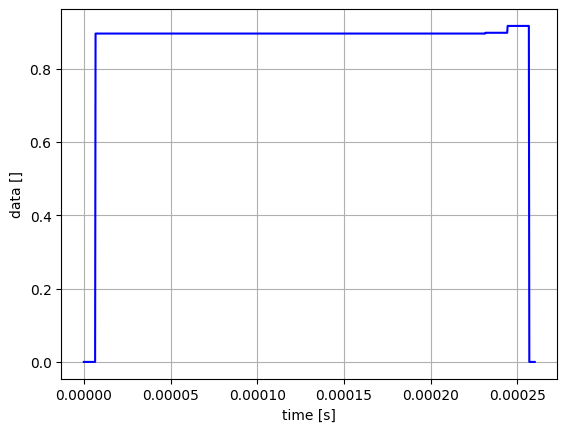

In [24]:
gd.Measurements_Periodic.dutycycle_neg_curve(level=1, hysteresis=0.1).plot()

## On/Off-Time Measurements

### On-time waveform

Returns the on-time of the signal represented as waveform

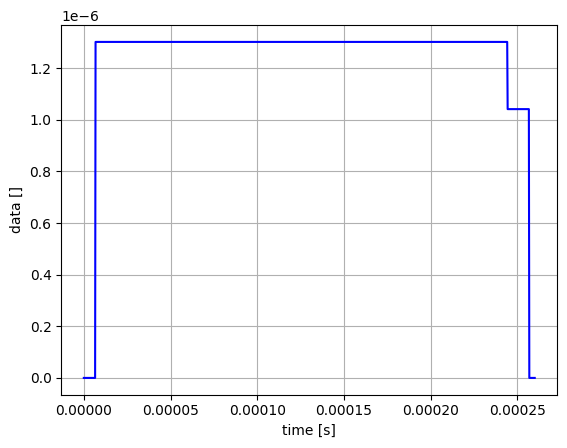

In [25]:
gd.Measurements_Periodic.on_time_curve(level=1, hysteresis=0.1).plot()

### Off-time waveform

Returns the off-time of the signal represented as waveform

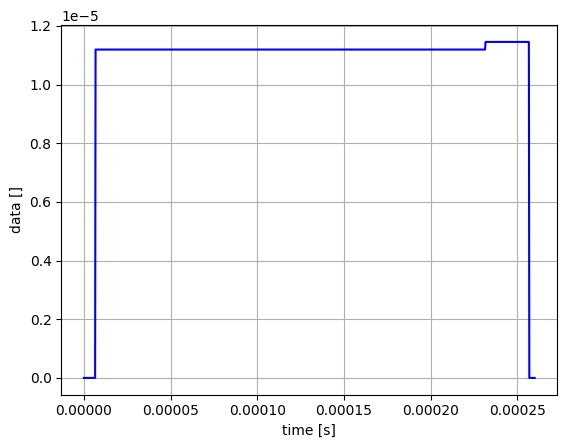

In [26]:
gd.Measurements_Periodic.off_time_curve(level=1, hysteresis=0.1).plot()